In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
#import the data set 
df = pd.read_csv('results.csv')
df.head(10)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


#### This data set if of Boston Marathon participants. It consists of 21 columns and 31984 rows of information of runners from all over the world. The dataset gives a breakdown of where they are from — country, city, and state when applicable— gender, age, and perfomance at different times throughout the race. 

In [3]:
#Look at the columns to see if any data is missing. 
df.count()

10k          31984
name         31984
division     31984
25k          31984
gender       31984
age          31984
official     31984
bib          31984
genderdiv    31984
ctz           1244
35k          31984
overall      31984
pace         31984
state        29408
30k          31984
5k           31984
half         31984
20k          31984
country      31984
city         31983
40k          31984
dtype: int64

 "ctz" and "state" seems to be missing alot of data and "ctz" doesn't seem significant enough to keep so I will drop the "ctz column and deal with state later on.

In [4]:
#drop 'ctz' column
df.drop('ctz', 1, inplace = True )
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


From earlier I knew that "state" was missing data, but at a closer look, it appears that the values that are missing are coming from foreign countries in which they do not have states. to fix this I will fill the vlaues with a key to indicate they are forgin countries. 

In [5]:
#fill satae column NaN values with "FOR" for foregin
df['state'].fillna('FOR', inplace = True)
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,FOR,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,FOR,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,FOR,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,FOR,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,FOR,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [6]:
#check to see if all columns are equal 
df.count()

10k          31984
name         31984
division     31984
25k          31984
gender       31984
age          31984
official     31984
bib          31984
genderdiv    31984
35k          31984
overall      31984
pace         31984
state        31984
30k          31984
5k           31984
half         31984
20k          31984
country      31984
city         31983
40k          31984
dtype: int64

There seems to be a runner missing a city, lets find that runner and see if we can figure out what city he/she is from. 

In [7]:
# find runner with NaN value in the city column 
null_data = df[df.isnull().any(axis=1)]
null_data

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
14553,50.03,"Caires, Maria G.",243,127.08,F,54,226.27,16645,4730,184.87,14260,8.63,FOR,155.30,25.22,106.45,100.78,BRA,NaN,213.47


The runner is from Brazil. Lets replace the runners city with the mode of runner cities from Brazil

In [8]:
#Check what cities runners from the country of Brazil are from. 
BRA = df.loc[df.country=='BRA']
BRA['city'].unique()

array(['Sao Paulo', 'Florianopolis', 'Jundiai S.p.', 'Jundiai',
       'Sao Bernardo Do Campo', 'Rio De Janeiro', 'Belo Horizonte, Mg.',
       'Maringa', 'Belo Horizonte', 'Brasilia', 'Ijui', 'Porto Alegre',
       'Rio De Janeiro (rj)', 'Salvador', 'Sao Paulo Sp', 'Goiania',
       'Cuiabá, Mt', 'Indaiatuba', 'Maceio', 'Rio De Janeiro, Rj', nan,
       'Brasília', 'Natal/Rn', 'Belo Horizonte/Mg', 'Campinas',
       'Guarulhos', 'São Paulo', 'Natal', 'São Paulo Sp', 'Piracicaba',
       'Curitiba', 'Goiânia'], dtype=object)

There are repeat cities just entered differently. I wil combine them to make the date more fluent

In [9]:
#Combine Cities 
df.replace({'Sao Paulo Sp': 'Sao Paulo','São Paulo Sp':'Sao Paulo', 'São Paulo Sp':'Sao Paulo',
            'Belo Horizonte, Mg.':'Belo Horizonte','Belo Horizonte/Mg':'Belo Horizonte', 'Brasília': 'Brasilia',
           'Natal/Rn':'Natal','Rio De Janeiro (rj)': 'Rio De Janeiro','Rio De Janeiro, Rj':'Rio De Janeiro', 'Jundiai S.p.':'Jundiai','São Paulo':'Sao Paulo'}, inplace=True)

In [10]:
BRA = df.loc[df.country=='BRA']
BRA['city'].unique()

array(['Sao Paulo', 'Florianopolis', 'Jundiai', 'Sao Bernardo Do Campo',
       'Rio De Janeiro', 'Belo Horizonte', 'Maringa', 'Brasilia', 'Ijui',
       'Porto Alegre', 'Salvador', 'Goiania', 'Cuiabá, Mt', 'Indaiatuba',
       'Maceio', nan, 'Natal', 'Campinas', 'Guarulhos', 'Piracicaba',
       'Curitiba', 'Goiânia'], dtype=object)

In [11]:
#fill NaN value with Median City 
df['city'].fillna('Sao Paulo', inplace=True)
df.count()

10k          31984
name         31984
division     31984
25k          31984
gender       31984
age          31984
official     31984
bib          31984
genderdiv    31984
35k          31984
overall      31984
pace         31984
state        31984
30k          31984
5k           31984
half         31984
20k          31984
country      31984
city         31984
40k          31984
dtype: int64

In [12]:
df.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


I am going to stat narrowing down my features. To start im going to adjust the categorical features as needed. if they deem to be useful, I will turn them into numerical categories. If they are not I will drop them. 

In [14]:
# one hot encode gender 
df['gender'] = np.where(df['gender'] == 'F',0,1)
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,1,47,85.25,W1,8,71.40,8,3.27,FOR,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,0,33,138.95,F1,1,116.37,21,5.30,FOR,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,1,41,80.60,W2,1,67.42,1,3.08,FOR,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,0,24,140.58,F2,3,116.37,27,5.37,FOR,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,1,40,81.23,W3,2,67.83,2,3.10,FOR,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [15]:
df.country.unique()

array(['JPN', 'KEN', 'RSA', 'ETH', 'SUI', 'USA', 'FRA', 'CAN', 'ESP',
       'POL', 'RUS', 'BLR', 'MAR', 'UKR', 'BRA', 'THA', 'CHN', 'ITA',
       'GER', 'GBR', 'AUS', 'SWE', 'GRE', 'SLO', 'IRL', 'KOR', 'ARG',
       'COL', 'NED', 'ISR', 'CZE', 'NOR', 'AUT', 'CRC', 'MEX', 'GUA',
       'SIN', 'DEN', 'HUN', 'BEL', 'FIN', 'CHI', 'ISL', 'VEN', 'DOM',
       'PER', 'HKG', 'SVK', 'NZL', 'TPE', 'PHI', 'CAY', 'POR', 'UAE',
       'IND', 'PAN', 'ROU', 'LUX', 'ESA', 'TRI', 'MAS', 'VGB', 'EGY',
       'BRN', 'EST', 'ECU', 'LIE', 'TUR', 'BOL', 'BAR', 'URU', 'QAT',
       'INA', 'BER', 'TAN', 'BAH', 'CRO', 'ZIM'], dtype=object)

In [16]:
#bib number is irrelevent, it doenst bring any beneifit to the data, and its a mix between numerical data and strings so I will drop it. 
kdf = df.drop(['bib', 'name'], axis=1)
kdf.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,8,47.67,1,47,85.25,8,71.40,8,3.27,FOR,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,1,82.43,0,33,138.95,1,116.37,21,5.30,FOR,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,1,45.80,1,41,80.60,1,67.42,1,3.08,FOR,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,3,82.43,0,24,140.58,3,116.37,27,5.37,FOR,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,2,46.37,1,40,81.23,2,67.83,2,3.10,FOR,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


Country column could be very useful, but I cant use it the way it is. I have to encode it aswell

In [17]:
# one hot encode Country column 
kdfhot = pd.get_dummies(kdf, columns=['country'])


In [18]:
kdfhot.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,...,country_TPE,country_TRI,country_TUR,country_UAE,country_UKR,country_URU,country_USA,country_VEN,country_VGB,country_ZIM
0,17.37,8,47.67,1,47,85.25,8,71.40,8,3.27,...,0,0,0,0,0,0,0,0,0,0
1,32.58,1,82.43,0,33,138.95,1,116.37,21,5.30,...,0,0,0,0,0,0,0,0,0,0
2,16.62,1,45.80,1,41,80.60,1,67.42,1,3.08,...,0,0,0,0,0,0,0,0,0,0
3,32.57,3,82.43,0,24,140.58,3,116.37,27,5.37,...,0,0,0,0,0,0,0,0,0,0
4,17.12,2,46.37,1,40,81.23,2,67.83,2,3.10,...,0,0,0,0,0,0,0,0,0,0


## Visualize the data 

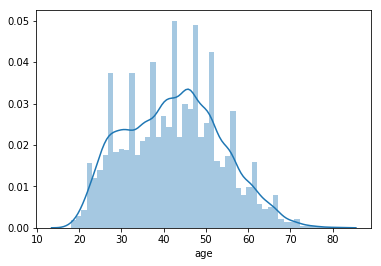

In [19]:
#check the distrabution of age 
sns.distplot(kdfhot['age'])
plt.show()

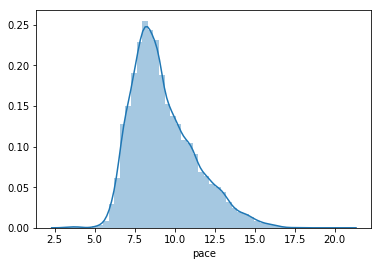

In [20]:
#check the distrabution of runner pace 
sns.distplot(kdfhot['pace'])
plt.show()

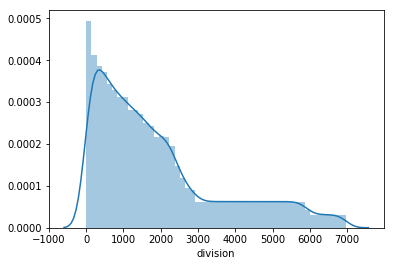

In [21]:
#check the distrabution of division 
sns.distplot(kdfhot['division'])
plt.show()

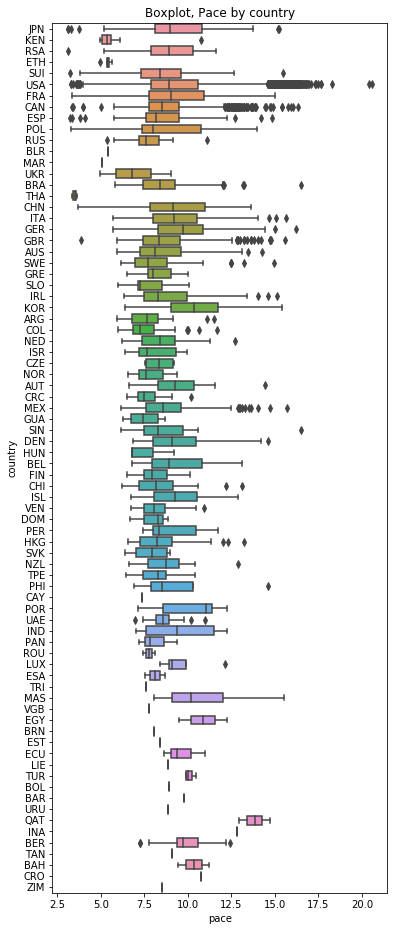

In [22]:
# plot data by pace per country 
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=df,
    y='country',
    x='pace'
)
ax.set_title('Boxplot, Pace by country')
plt.show()

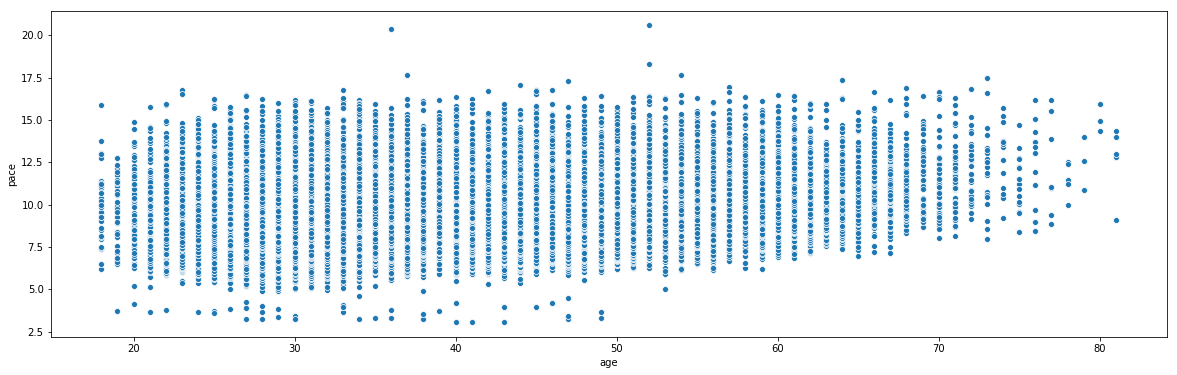

In [23]:
# See how runners pace via age 
fig, ax = plt.subplots(figsize=[20, 6])
sns.scatterplot( kdfhot['age'] ,kdfhot['pace'],
               )

plt.show()

After looking at the data, I realized that the columns city and state are not needed. I dont think removing them fro m the data will have a negative effect on the outcome. I will drop the two columns

In [24]:
#drop city
kdfhot.drop('city', axis=1, inplace=True)

In [25]:
#drop state
kdfhot.drop('state', axis=1, inplace=True)

In [26]:
kdfhot.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,...,country_TPE,country_TRI,country_TUR,country_UAE,country_UKR,country_URU,country_USA,country_VEN,country_VGB,country_ZIM
0,17.37,8,47.67,1,47,85.25,8,71.40,8,3.27,...,0,0,0,0,0,0,0,0,0,0
1,32.58,1,82.43,0,33,138.95,1,116.37,21,5.30,...,0,0,0,0,0,0,0,0,0,0
2,16.62,1,45.80,1,41,80.60,1,67.42,1,3.08,...,0,0,0,0,0,0,0,0,0,0
3,32.57,3,82.43,0,24,140.58,3,116.37,27,5.37,...,0,0,0,0,0,0,0,0,0,0
4,17.12,2,46.37,1,40,81.23,2,67.83,2,3.10,...,0,0,0,0,0,0,0,0,0,0


In [27]:
kdfhot.dtypes

10k             object
division         int64
25k             object
gender           int64
age              int64
official       float64
genderdiv        int64
35k             object
overall          int64
pace           float64
30k             object
5k              object
half            object
20k             object
40k             object
country_ARG      uint8
country_AUS      uint8
country_AUT      uint8
country_BAH      uint8
country_BAR      uint8
country_BEL      uint8
country_BER      uint8
country_BLR      uint8
country_BOL      uint8
country_BRA      uint8
country_BRN      uint8
country_CAN      uint8
country_CAY      uint8
country_CHI      uint8
country_CHN      uint8
                ...   
country_MEX      uint8
country_NED      uint8
country_NOR      uint8
country_NZL      uint8
country_PAN      uint8
country_PER      uint8
country_PHI      uint8
country_POL      uint8
country_POR      uint8
country_QAT      uint8
country_ROU      uint8
country_RSA      uint8
country_RUS

After checking the data types of the cells, There are several columns that have a data type of an Object. In order to perform clustring on the data, I will have to change those columns into floats.  

In [38]:
#convert columns to floats 
kdfhot['10k'] = pd.to_numeric(kdfhot['10k'],errors='coerce')
kdfhot['25k'] = pd.to_numeric(kdfhot['25k'],errors='coerce')
kdfhot['35k'] = pd.to_numeric(kdfhot['35k'],errors='coerce')
kdfhot['30k'] = pd.to_numeric(kdfhot['30k'],errors='coerce')
kdfhot['5k'] = pd.to_numeric(kdfhot['5k'],errors='coerce')
kdfhot['10k'] = pd.to_numeric(kdfhot['half'],errors='coerce')
kdfhot['20k'] = pd.to_numeric(kdfhot['20k'],errors='coerce')
kdfhot['40k'] = pd.to_numeric(kdfhot['40k'],errors='coerce')
kdfhot['half'] = pd.to_numeric(kdfhot['half'],errors='coerce')
kdfhot.dtypes

10k            float64
division         int64
25k            float64
gender           int64
age              int64
official       float64
genderdiv        int64
35k            float64
overall          int64
pace           float64
30k            float64
5k             float64
half           float64
20k            float64
40k            float64
country_ARG      uint8
country_AUS      uint8
country_AUT      uint8
country_BAH      uint8
country_BAR      uint8
country_BEL      uint8
country_BER      uint8
country_BLR      uint8
country_BOL      uint8
country_BRA      uint8
country_BRN      uint8
country_CAN      uint8
country_CAY      uint8
country_CHI      uint8
country_CHN      uint8
                ...   
country_MEX      uint8
country_NED      uint8
country_NOR      uint8
country_NZL      uint8
country_PAN      uint8
country_PER      uint8
country_PHI      uint8
country_POL      uint8
country_POR      uint8
country_QAT      uint8
country_ROU      uint8
country_RSA      uint8
country_RUS

In [39]:
y=kdfhot['gender']
x=kdfhot.drop('gender',axis=1)
x.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,...,country_TPE,country_TRI,country_TUR,country_UAE,country_UKR,country_URU,country_USA,country_VEN,country_VGB,country_ZIM
0,39.72,8,47.67,47,85.25,8,71.40,8,3.27,59.18,...,0,0,0,0,0,0,0,0,0,0
1,69.47,1,82.43,33,138.95,1,116.37,21,5.30,99.33,...,0,0,0,0,0,0,0,0,0,0
2,38.03,1,45.80,41,80.60,1,67.42,1,3.08,56.45,...,0,0,0,0,0,0,0,0,0,0
3,69.47,3,82.43,24,140.58,3,116.37,27,5.37,99.33,...,0,0,0,0,0,0,0,0,0,0
4,38.60,2,46.37,40,81.23,2,67.83,2,3.10,57.03,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

I have to make sure all NaN values are removed to perform K-Means. If there is a small number of NaN values, I will drop the rows. If not, I will decide what to do individually. 

In [48]:
x.isnull().sum()

10k             72
division         0
25k            216
age              0
official         0
genderdiv        0
35k             34
overall          0
pace             0
30k             40
5k              52
half            72
20k             51
40k             39
country_ARG      0
country_AUS      0
country_AUT      0
country_BAH      0
country_BAR      0
country_BEL      0
country_BER      0
country_BLR      0
country_BOL      0
country_BRA      0
country_BRN      0
country_CAN      0
country_CAY      0
country_CHI      0
country_CHN      0
country_COL      0
              ... 
country_MEX      0
country_NED      0
country_NOR      0
country_NZL      0
country_PAN      0
country_PER      0
country_PHI      0
country_POL      0
country_POR      0
country_QAT      0
country_ROU      0
country_RSA      0
country_RUS      0
country_SIN      0
country_SLO      0
country_SUI      0
country_SVK      0
country_SWE      0
country_TAN      0
country_THA      0
country_TPE      0
country_TRI 

There arent that many NaN values relative to the total number of entries and they are mainly in spcific legs of the race. I think we can just drop these runners from the data set because we still have a large amount of runners. 

In [49]:
x = x.dropna(axis=1, how='any')
x.isnull().sum()

division       0
age            0
official       0
genderdiv      0
overall        0
pace           0
country_ARG    0
country_AUS    0
country_AUT    0
country_BAH    0
country_BAR    0
country_BEL    0
country_BER    0
country_BLR    0
country_BOL    0
country_BRA    0
country_BRN    0
country_CAN    0
country_CAY    0
country_CHI    0
country_CHN    0
country_COL    0
country_CRC    0
country_CRO    0
country_CZE    0
country_DEN    0
country_DOM    0
country_ECU    0
country_EGY    0
country_ESA    0
              ..
country_MEX    0
country_NED    0
country_NOR    0
country_NZL    0
country_PAN    0
country_PER    0
country_PHI    0
country_POL    0
country_POR    0
country_QAT    0
country_ROU    0
country_RSA    0
country_RUS    0
country_SIN    0
country_SLO    0
country_SUI    0
country_SVK    0
country_SWE    0
country_TAN    0
country_THA    0
country_TPE    0
country_TRI    0
country_TUR    0
country_UAE    0
country_UKR    0
country_URU    0
country_USA    0
country_VEN   

to make kmeans easier to plot and perform faster I will use PCA to reduce the dimensionalty of the data set. To smooth out the process of PCA I wil normalize the data first. After that I will apply K-means to the dataset.

In [51]:
#normalize x and apply PCA 
x_norm = normalize(x)
x_pca = PCA(2).fit_transform(x_norm)

I will apply kmeans starting with 2 clusters and add clusters to see if performance changes 

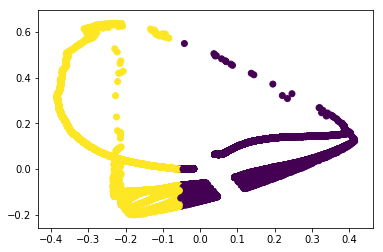

Comparing k-means clusters against the data:
gender      0      1
row_0               
0       14345   7388
1          22  10229


In [55]:
#apply K-means, plot the output, and compare using crosstab. 
y_pred2 = KMeans(n_clusters=2, random_state=42).fit_predict(x_pca)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_pred2)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred2, y))

Two clusters didnt do so well, so i will increase the number of clusters. 

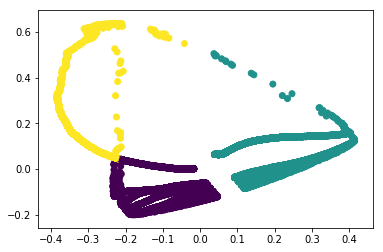

Comparing k-means clusters against the data:
gender      0      1
row_0               
0           0  14287
1       14344      0
2          23   3330


In [56]:
#apply K-means, plot the output, and compare using crosstab. 
y_pred3 = KMeans(n_clusters=3, random_state=42).fit_predict(x_pca)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_pred3)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred3, y))

3 clusters performed alot better than 2 clusters. I will check 4 clusters to see if we can improve anymore. 

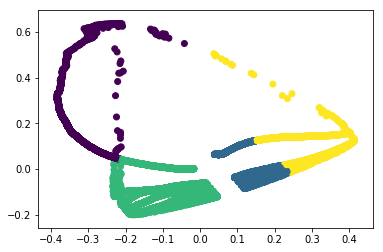

Comparing k-means clusters against the data:
gender      0      1
row_0               
0          23   3330
1       10642      0
2           0  14287
3        3702      0


In [57]:
#apply K-means, plot the output, and compare using crosstab. 
y_pred4 = KMeans(n_clusters=4, random_state=42).fit_predict(x_pca)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_pred4)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred4, y))

Seems to be the same as 3 clusters, so we will stick with 3 clusters. I will run a Mini Batch to compare the results of the 2.

In [62]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=200)
minibatchkmeans.fit(x_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(x_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0     0     1     2     3      4
row_0                               
0         0  3698     0     0  10646
1         0     0  3223   603      0
2      9030     0     0  4784      0


Mini batch does slightly better so we can stick with this model. 